In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setup

In [3]:
# importar bibliotecas
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as ir
from plotly.subplots import make_subplots

In [4]:
caminho = "/content/drive/MyDrive/UFCG/CDP/Ensemble/data/heart.csv"
heart = pd.read_csv(caminho)

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EDA

In [6]:
heart.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Não temos dados faltantes na nossa base.

In [ ]:
heart.duplicated().sum()

723

In [ ]:
heart[heart.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


As duplicatas existentes não são um problema, tendo em vista que é esperdo que os dados se repitam para muitos dos casos.

In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


O valor médio é semelhante ao valor mediano (percentil 50: 50%)

## Algumas Visualizações

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

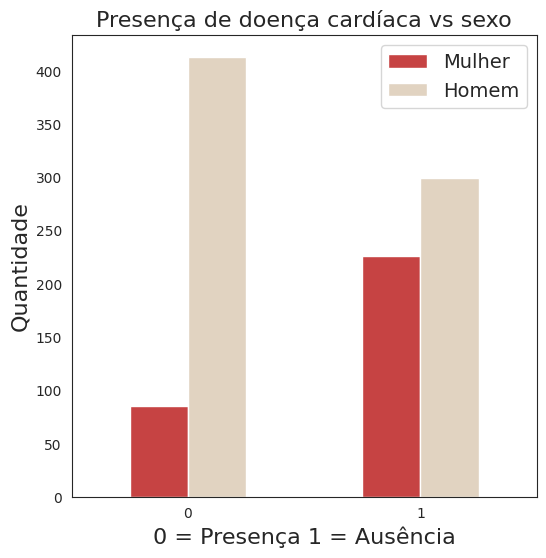

In [ ]:
df = pd.crosstab(heart[ 'target' ],heart[ 'sex' ])
sns.set_style( "white" )

df.plot(kind= "bar" ,
        figsize=( 6 , 6 ),
        color=[ '#c64343' , '#e1d3c1' ]);

plt.title( "Presença de doença cardíaca vs sexo" , fontsize= 16 )
plt.xlabel( "0 = Presença 1 = Ausência" , fontsize= 16 )
plt.ylabel( "Quantidade" , fontsize= 16 )
plt.legend ([ "Mulher" , "Homem" ], fontsize= 14 )
plt.xticks(rotation= 0 )

In [ ]:
heart['sex'] = heart['sex'].map({0: 'Mulher', 1: 'Homem'})

fig = px.pie(heart,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )

# layout
fig.update_layout(title_text='Distribuição por Gênero',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

Homens tem mais presença de doenças cardíacas.

<ipython-input-37-35e3123b7014>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




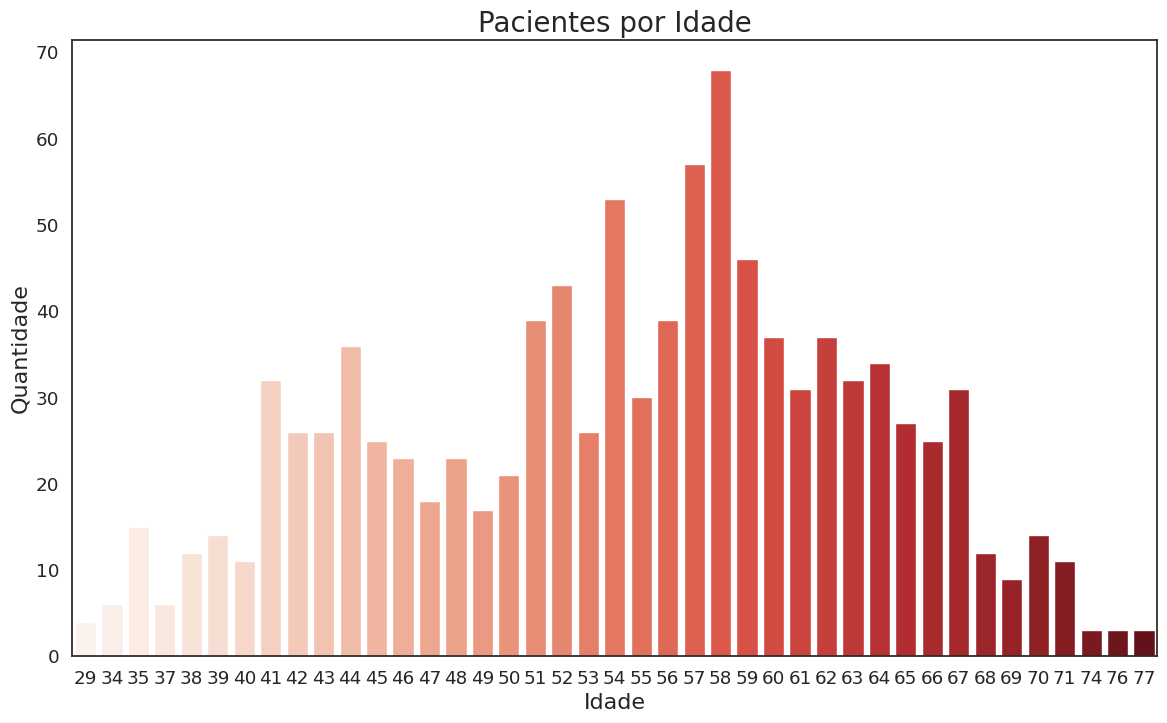

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Pacientes por Idade",fontsize=20)
plt.xlabel("Idade",fontsize=16)
plt.ylabel("Quantidade",fontsize=16)
plt.show()

<ipython-input-38-234b3723a9ab>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




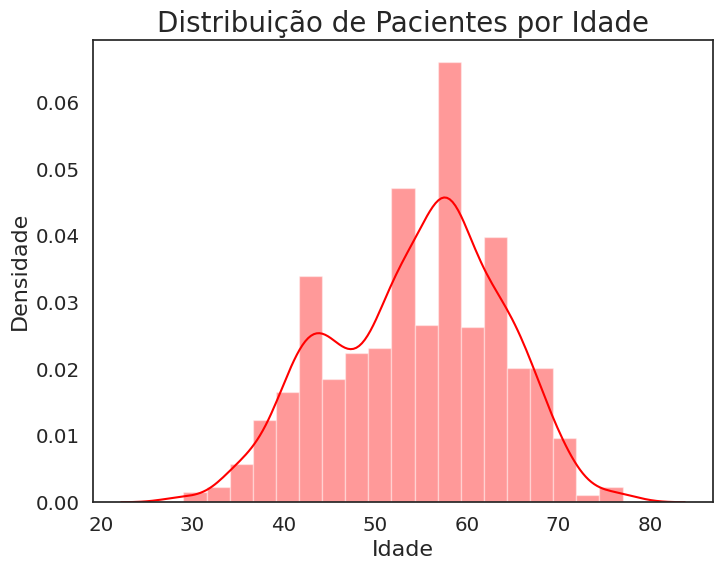

In [ ]:
# age based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribuição de Pacientes por Idade",fontsize=20)
plt.xlabel("Idade",fontsize=16)
plt.ylabel("Densidade",fontsize=16)
plt.show()

<ipython-input-39-02b14c98901e>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-39-02b14c98901e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




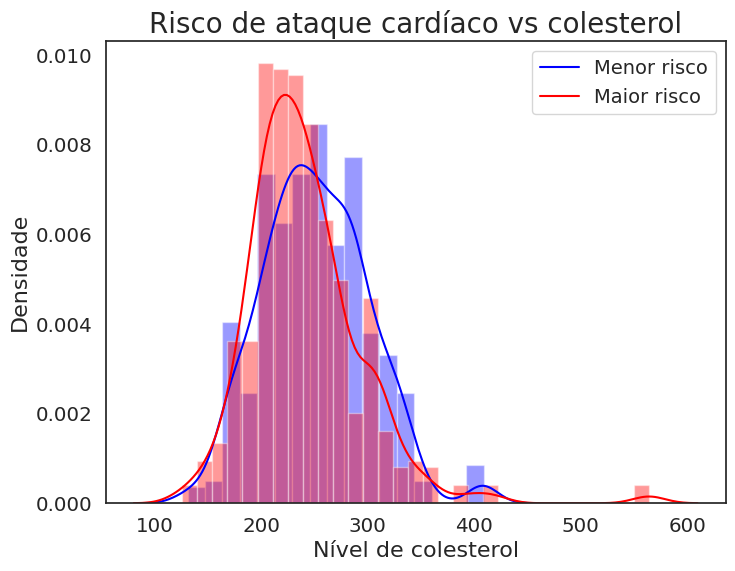

In [ ]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart[heart["target"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["target"]==1]["chol"],
             color="red")

plt.title("Risco de ataque cardíaco vs colesterol", size=20)
plt.xlabel("Nível de colesterol", fontsize=16)
plt.ylabel("Densidade", fontsize=16)
plt.legend(["Menor risco","Maior risco"], fontsize=14)
plt.show()

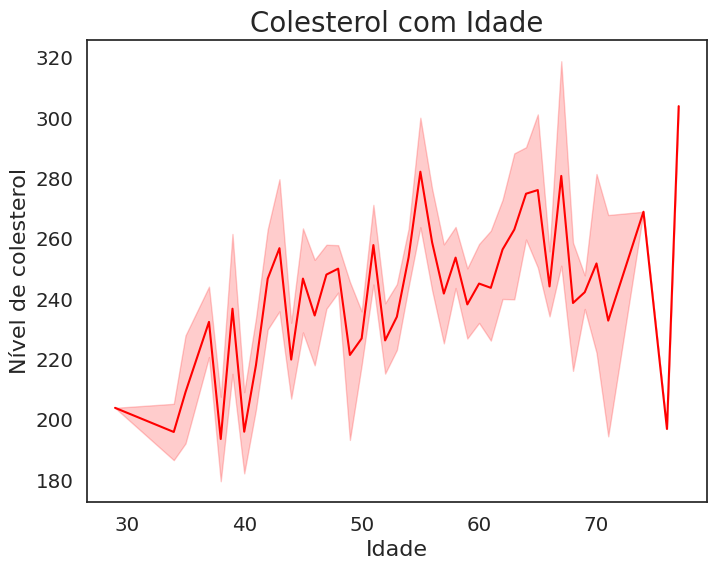

In [ ]:
plt.figure(figsize=( 8 , 6 ))

sns.lineplot(y= "chol" ,
             x= "age" ,
             data=heart,
             color= "red" )
plt.title( "Colesterol com Idade" ,fontsize= 20 )
plt.xlabel( "Idade" ,fontsize= 16 )
plt.ylabel( "Nível de colesterol" ,fontsize= 16 )
plt.show()

In [ ]:
caminho = "/content/drive/MyDrive/UFCG/CDP/Ensemble/data/heart.csv"
heart = pd.read_csv(caminho)

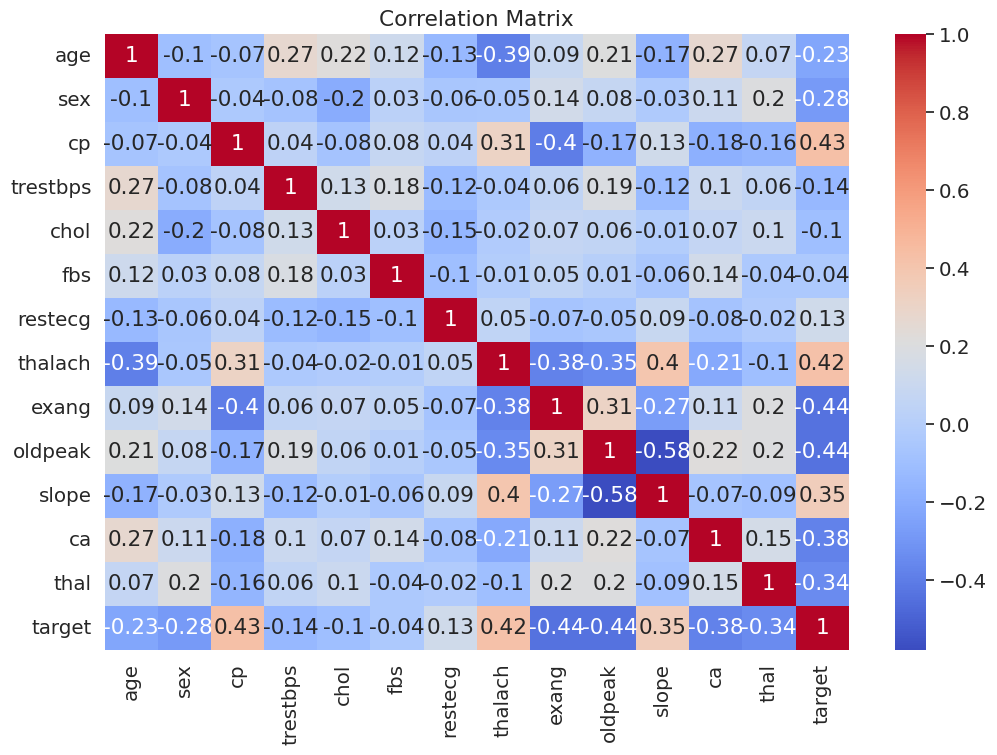

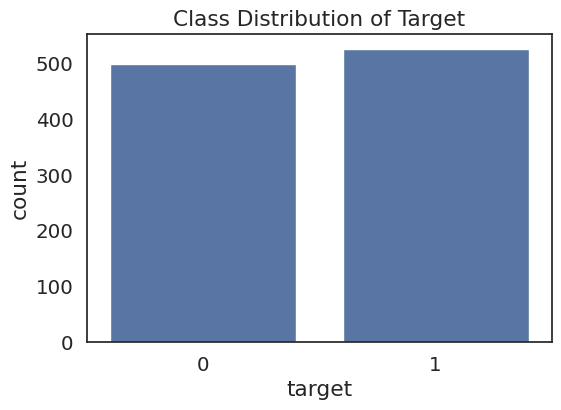

After SMOTE, counts of label '1': 526
After SMOTE, counts of label '0': 526


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # adicione outras colunas conforme necessário
heart[columns_to_scale] = scaler.fit_transform(heart[columns_to_scale])

# 2. Correlação entre as variáveis preditoras e a variável-alvo
correlation_matrix = heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Balanceamento das classes (variável-alvo)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart)
plt.title('Class Distribution of Target')
plt.show()

# Se necessário, rebalancear as classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = heart.drop('target', axis=1), heart['target']
X_res, y_res = smote.fit_resample(X, y)
print('After SMOTE, counts of label \'1\': {}'.format(sum(y_res == 1)))
print('After SMOTE, counts of label \'0\': {}'.format(sum(y_res == 0)))

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


# Explicações:
Normalização: O código usa StandardScaler para normalizar as colunas selecionadas.

Correlação: Uma matriz de correlação é gerada para visualizar como as variáveis estão relacionadas entre si e principalmente com a variável-alvo. Altas correlações positivas ou negativas podem indicar boas variáveis preditoras.

Balanceamento das classes: O código visualiza a distribuição da variável-alvo e, se necessário, usa SMOTE para rebalancear as classes. Desbalanceamento de classes pode levar a modelos enviesados, que favorecem a classe majoritária.

## Matriz de Correlação
* Correlações com a Variável Alvo: A variável cp (tipo de dor no peito) tem uma
correlação moderadamente positiva com a variável alvo target, indicando que quanto maior o valor de cp, maior a chance do paciente ter doença cardíaca, conforme definido neste conjunto de dados. Além disso, thalach (frequência cardíaca máxima) e slope (inclinação do segmento ST de exercício) também mostram correlações positivas moderadas, sugerindo que valores mais altos dessas variáveis podem estar associados com a presença de doença cardíaca.
* Correlações Negativas: exang (angina induzida por exercício), oldpeak (queda do ST induzida por exercício) e ca (número de vasos principais coloridos por fluoroscopia) têm correlações negativas com a variável alvo, o que sugere que valores mais altos dessas variáveis podem estar associados com a ausência de doença cardíaca.
* Pouca ou Nenhuma Correlação: Variáveis como sex, trestbps (pressão arterial em repouso) e chol (colesterol total) têm correlações muito baixas com a variável alvo, indicando que elas têm menos poder preditivo em relação à presença de doença cardíaca neste conjunto de dados específico.
## Distribuição de Classe da Variável Alvo
* O segundo gráfico mostra a distribuição das classes da variável alvo target, com a classe "0" representando pacientes sem doença cardíaca e a classe "1" representando pacientes com doença cardíaca. As duas classes parecem estar razoavelmente balanceadas, o que é bom para a modelagem preditiva, pois um desbalanceamento significativo poderia enviesar o modelo para prever predominantemente a classe majoritária.
## Conclusões
1. Variáveis como tipo de dor no peito (cp), frequência cardíaca máxima (thalach) e a inclinação do segmento ST de exercício (slope) são potencialmente bons preditores para a presença de doença cardíaca e devem ser considerados em modelos preditivos.
2. Variáveis com correlações negativas significativas como angina induzida por exercício (exang), queda do ST induzida por exercício (oldpeak) e o número de vasos principais (ca) também são importantes e podem ajudar a distinguir entre a presença e ausência de doença cardíaca.
3. Algumas variáveis têm pouca correlação com a variável alvo, o que sugere que elas podem não ser tão úteis na previsão de doença cardíaca e poderiam potencialmente ser excluídas de análises mais profundas, dependendo do contexto e de uma compreensão mais detalhada do domínio.
A variável alvo está bem balanceada, o que significa que técnicas especiais de balanceamento de classe, como o uso de SMOTE, podem não ser necessárias.


# Treinando e Avaliando

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = heart.drop('target', axis=1)
y = heart['target']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar um dicionário de modelos
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

# Parâmetros para GridSearch
params = {
    'RandomForest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'ExtraTrees': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'LogisticRegression': {'C': [0.1, 1, 10]}
}

# Lista para guardar os melhores modelos
best_estimators = {}

# Fine-tuning de cada modelo usando GridSearchCV
for model_name in models:
    clf = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_estimators[model_name] = clf.best_estimator_
    print(f"Melhor {model_name}: {clf.best_params_}")
    print(f"Acurácia: {clf.best_score_:.4f}")

# Avaliar o desempenho dos modelos no conjunto de teste
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"Avaliação do {model_name} no conjunto de teste:")
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

Melhor RandomForest: {'max_depth': None, 'n_estimators': 100}
Acurácia: 0.9651
Melhor ExtraTrees: {'max_depth': None, 'n_estimators': 10}
Acurácia: 0.9749
Melhor AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Acurácia: 0.9400
Melhor GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200}
Acurácia: 0.9637
Melhor LogisticRegression: {'C': 1}
Acurácia: 0.8480
Avaliação do RandomForest no conjunto de teste:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Acurácia: 0.9805
Avaliação do ExtraTrees no conjunto de teste:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                

## Explicações:
* Este código usa GridSearchCV para fazer o fine-tuning dos hiperparâmetros dos modelos. GridSearchCV é um método que percorre combinações de parâmetros fornecidas e executa validação cruzada para cada combinação para encontrar a melhor configuração de hiperparâmetros.
*  As métricas de desempenho usadas aqui são a acurácia e o classification_report, que fornece precision, recall, f1-score para cada classe.
*  A Regressão Logística é usada como baseline por ser um modelo simples e eficiente para problemas de classificação binária.
*  O conjunto de dados é dividido em 70% para treinamento e 30% para teste.
*  A semente aleatória (random_state) é definida para garantir reprodutibilidade nos resultados.

## Resultados:
1. Resultados do GridSearchCV (validação cruzada):
*  RandomForest e ExtraTrees: Esses dois modelos tiveram um desempenho muito semelhante durante a fase de treinamento, com o ExtraTrees ligeiramente à frente. O melhor modelo Random Forest não impôs um limite na profundidade máxima das árvores (max_depth: None) e usou 100 árvores (n_estimators: 100). Por outro lado, o melhor modelo ExtraTrees também não impôs um limite na profundidade das árvores, mas encontrou seu melhor desempenho com apenas 10 árvores. Isso sugere que o ExtraTrees pode ser mais eficiente em termos computacionais.
*  AdaBoost: O melhor modelo AdaBoost usou uma taxa de aprendizagem relativamente alta (learning_rate: 1) e um grande número de estimadores (n_estimators: 200), o que indica uma confiança maior nos modelos base durante a combinação dos seus resultados.
*  GradientBoosting: Com uma taxa de aprendizagem de 0.1 e 200 estimadores, o modelo GradientBoosting também mostrou um desempenho alto, similar ao RandomForest. A taxa de aprendizagem menor sugere que cada modelo base contribuiu de forma incremental para a performance final.
*  LogisticRegression: Como um modelo baseline que não utiliza métodos de ensemble, a regressão logística teve um desempenho mais fraco do que os modelos de ensemble. No entanto, ainda é um modelo valioso devido à sua simplicidade e interpretabilidade.
2.  Resultados no Conjunto de Teste:
*  RandomForest e ExtraTrees: No teste, ambos tiveram uma acurácia de 98.05%, com scores de precisão e recall perfeitos para a classe 1. Isso indica que esses modelos estão muito bem ajustados e são capazes de generalizar bem para dados não vistos.
*  AdaBoost: A acurácia caiu para 90.26% no conjunto de teste, indicando que, apesar do bom ajuste durante o treinamento, o modelo pode não estar generalizando tão bem quanto os outros modelos de ensemble.
*  GradientBoosting: Com a maior acurácia de 99.03%, o modelo GradientBoosting se destacou, apresentando a melhor generalização no conjunto de teste.
LogisticRegression: Com uma acurácia de 80.52%, a regressão logística teve o desempenho mais fraco no conjunto de teste, o que era esperado, mas fornece um ponto de referência útil para entender o benefício dos métodos de ensemble.
3.  Considerações Finais:
Os modelos que combinam vários pequenos modelos, como o GradientBoosting, foram melhores em identificar doenças cardíacas do que o modelo mais simples de regressão logística. Ao escolher o modelo mais adequado para a situação que temos, é importante olhar não só para a precisão geral, mas também para como o modelo distingue entre os resultados positivos e negativos, o que é muito importante em situações médicas. Além disso, é preciso considerar o quanto o modelo é complexo e quanto tempo leva para ser calculado. O GradientBoosting foi o melhor nesses testes, mas modelos mais rápidos e simples, como o ExtraTrees, podem ser úteis quando tempo e recursos de computador são limitados. Ajustar bem os detalhes dos modelos foi essencial para que eles funcionassem melhor, e essa configuração deve ser bem pensada, baseando-se em um bom conhecimento do modelo e do problema que estou tentando resolver.

#  Features mais importantes

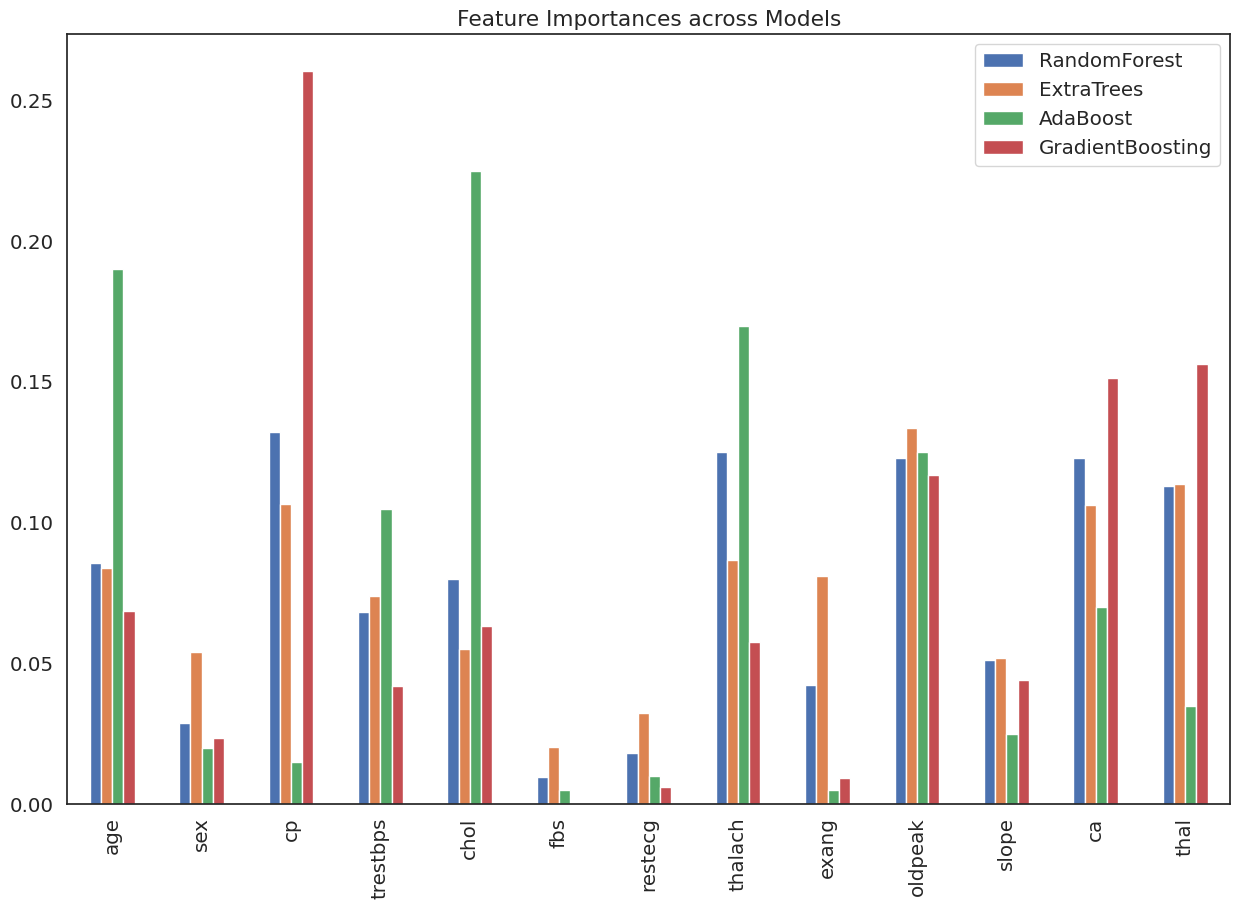

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances_df = pd.DataFrame(index=X.columns)

models = ['RandomForest', 'ExtraTrees', 'AdaBoost', 'GradientBoosting']

for model_name in models:
    model = best_estimators[model_name]
    feature_importances_df[model_name] = model.feature_importances_

feature_importances_df = feature_importances_df / feature_importances_df.sum()

feature_importances_df.plot(kind='bar', figsize=(15, 10))
plt.title('Feature Importances across Models')
plt.show()

In [ ]:
!pip install shap

PermutationExplainer explainer: 309it [02:44,  1.78it/s]
PermutationExplainer explainer: 309it [00:31,  6.44it/s]                         
PermutationExplainer explainer: 309it [08:08,  1.62s/it]
PermutationExplainer explainer: 309it [00:53,  4.59it/s]
PermutationExplainer explainer: 309it [00:20,  6.57it/s]                         


RandomForest SHAP Summary Plot


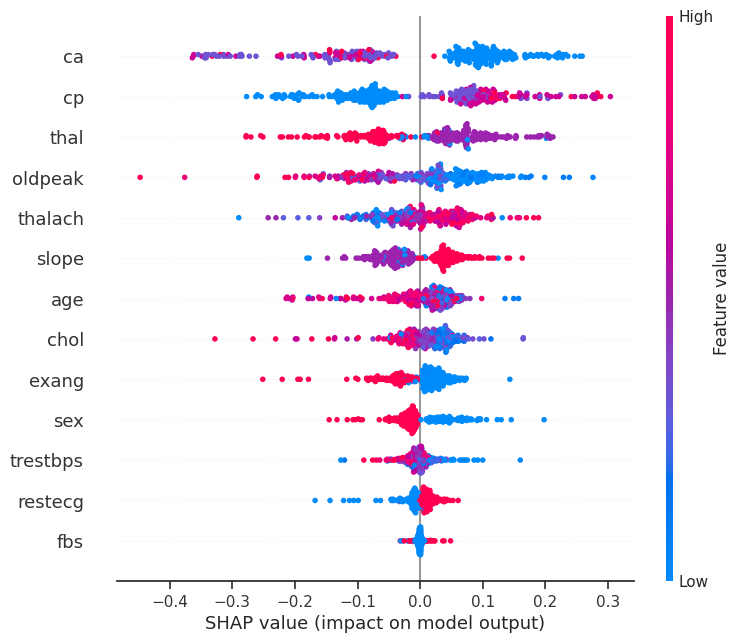

ExtraTrees SHAP Summary Plot


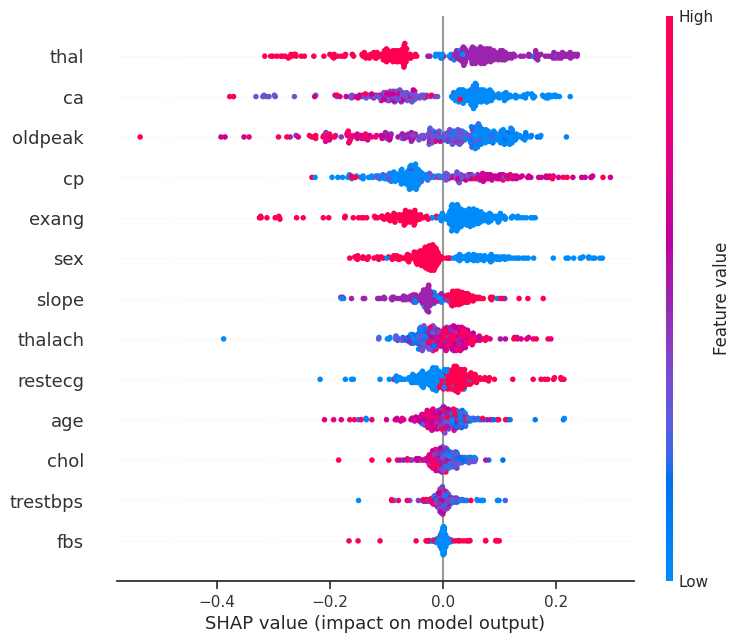

AdaBoost SHAP Summary Plot


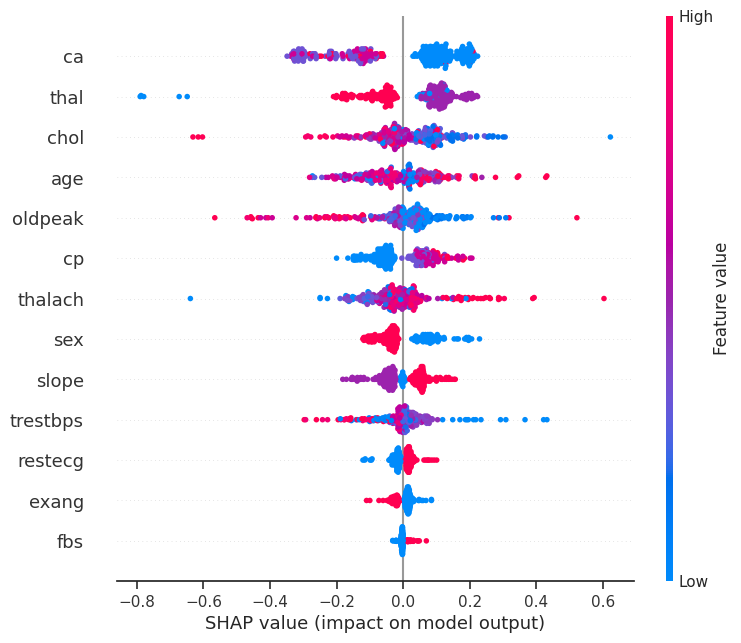

GradientBoosting SHAP Summary Plot


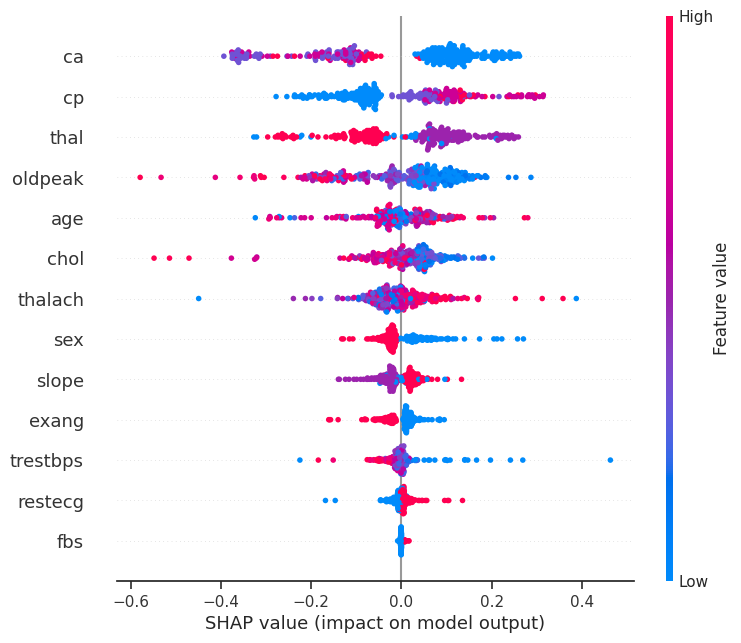

LogisticRegression SHAP Summary Plot


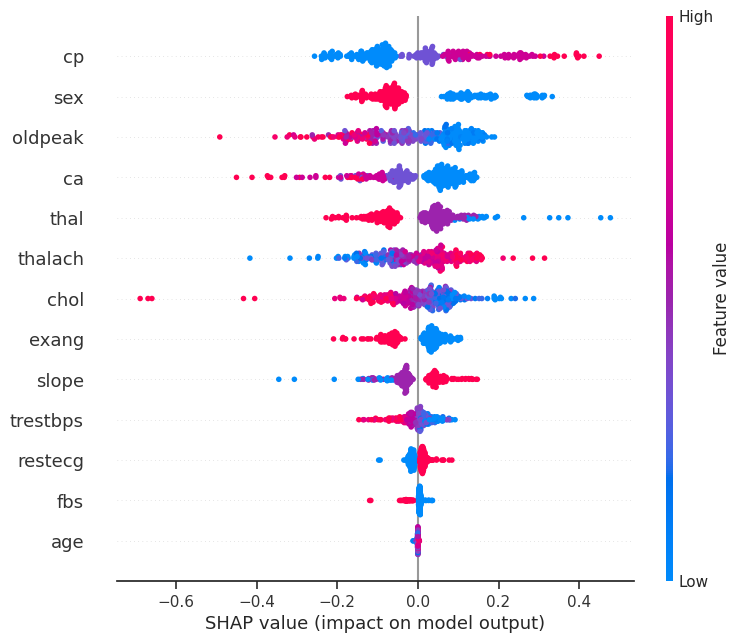

In [ ]:
import shap

shap_values = {}
explainers = {}

for model_name, model in best_estimators.items():
    explainers[model_name] = shap.Explainer(model.predict, X_test)
    shap_values[model_name] = explainers[model_name](X_test)

for model_name in shap_values:
    print(f'{model_name} SHAP Summary Plot')
    shap.summary_plot(shap_values[model_name], X_test )

# Comparando as Saídas
Olhando para os gráficos de importância das características e os plots SHAP para os diferentes modelos, parece que algumas informações sobre a saúde do coração são consistentemente mais importantes que outras quando se trata de prever doenças cardíacas. Por exemplo, o número de vasos sanguíneos principais afetados e a presença de certas condições sanguíneas são geralmente vistos como importantes em todos os modelos.

Os gráficos também mostram que as contribuições de cada informação podem variar um pouco dependendo do modelo específico. Isso quer dizer que, embora algumas coisas sejam geralmente importantes, o quanto elas são importantes pode mudar se você olhar para elas de maneiras diferentes.

Além disso, os valores SHAP nos ajudam a entender não apenas quais informações são importantes, mas também como valores altos ou baixos dessas informações afetam a previsão do modelo. Por exemplo, se um paciente tem muitos vasos sanguíneos afetados, isso pode aumentar a previsão de uma doença cardíaca.

Em resumo, parece que os modelos estão concordando em grande parte sobre o que é importante para prever doenças cardíacas, mas cada modelo tem sua própria maneira de pesar essas informações.